<a href="https://colab.research.google.com/github/mdonbruce/AspNetDocs/blob/master/Module02_OOP_Colab_EXECUTED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2 — OOP Retail Orders (Colab-ready, Executed)

This notebook contains a **complete working solution** for the in-class activity.

### If you're using Google Colab
1. Upload `orders_oop_large.csv` (Files panel), then set `CSV_PATH = '/content/orders_oop_large.csv'`.
2. Run cells top-to-bottom.

**Note:** Your class deliverable should be based on the starter notebook with TODOs.

In [6]:
import pandas as pd
import numpy as np

# Local execution path (this environment)
CSV_PATH = 'orders_oop_large.csv'

# Colab tip:
# CSV_PATH = '/content/orders_oop_large.csv'

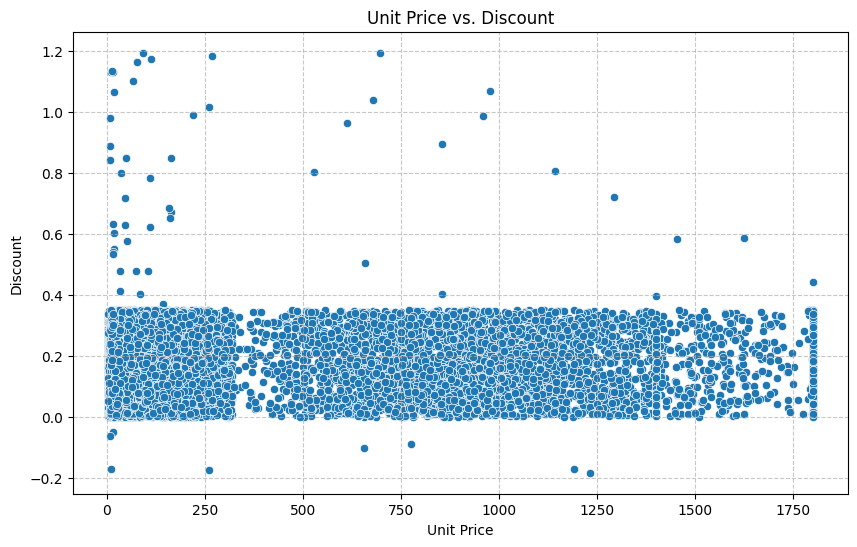

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='unit_price', y='discount', data=df)
plt.title('Unit Price vs. Discount')
plt.xlabel('Unit Price')
plt.ylabel('Discount')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

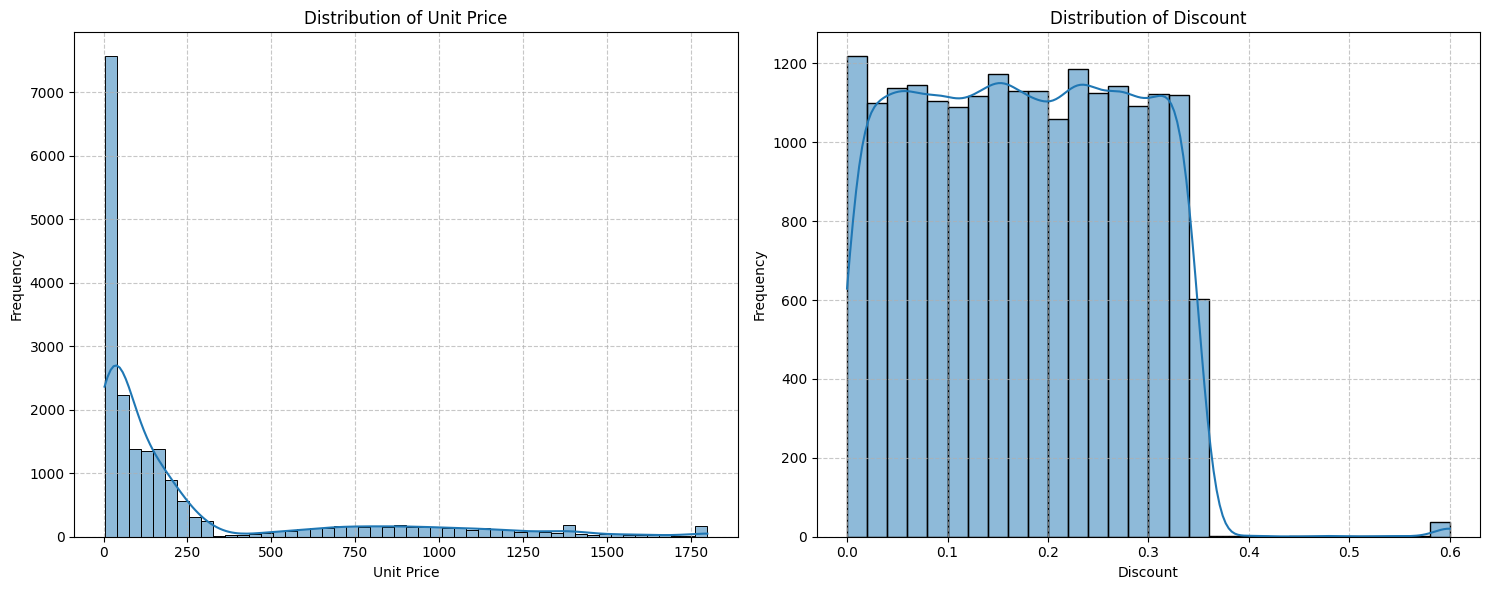

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(df2['unit_price'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Unit Price')
axes[0].set_xlabel('Unit Price')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, linestyle='--', alpha=0.7)

sns.histplot(df2['discount'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Discount')
axes[1].set_xlabel('Discount')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Compare `unit_price` and `discount` distributions in `df2`
To compare the distributions of unit_price and discount in df2, I'll generate two histograms. This will allow us to see the shape, spread, and central tendency of each variable individually.

The histograms comparing the distributions of unit_price and discount in df2 have been successfully generated and displayed. These plots allow you to visually inspect their distributions:

Unit Price Distribution: You will likely observe that unit_price has a long tail to the right, meaning most items are inexpensive, but there are some significantly higher-priced items. The distribution might be skewed right.
Discount Distribution: The discount distribution will show the frequency of different discount percentages. Due to the cleaning steps applied in df2 (where discounts were capped at 60% and negative values set to 0%), you'll see values concentrated between 0 and 0.6. There might be peaks at 0% (no discount) and potentially at the 60% cap, with a spread in between.

In [17]:
display(df.describe())

,order_id,customer_id,quantity,unit_price,discount
count,20000.000000,20000.000000,20000.000000,20000.000000,19880.000000
mean,109999.500000,3481.959650,2.995400,260.983203,0.176440
std,5773.647028,1441.016287,1.430133,403.126435,0.106265
min,100000.000000,1000.000000,-2.000000,3.000000,-0.183000
25%,104999.750000,2236.000000,2.000000,21.290000,0.088000
50%,109999.500000,3480.000000,3.000000,78.390000,0.175000
75%,114999.250000,4723.250000,4.000000,222.812500,0.263000
max,119999.000000,5999.000000,5.000000,1800.000000,1.194000


In [7]:
df = pd.read_csv(CSV_PATH)
print('raw shape:', df.shape)
df.head()

raw shape: (20000, 8)


,order_id,customer_id,sku,quantity,unit_price,discount,order_status,order_timestamp
0,100000,1446,PHONE-009,5,424.57,0.171,RETURNED,2025-10-01 09:26:00
1,100001,4869,JACKET-180,4,157.88,0.203,COMPLETED,2025-12-02 19:17:00
2,100002,4272,LAPTOP-054,2,794.38,0.102,COMPLETED,2025-09-08 05:49:00
3,100003,3194,LAPTOP-178,5,889.75,0.258,CANCELLED,2025-11-06 21:34:00
4,100004,3165,TSHIRT-141,5,14.57,0.163,COMPLETED,2025-11-29 13:14:00


In [25]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1SkxfcCovAJQ-ckSmMG2xw6CP3TrcLNTkIyNBFbcZud8/edit#gid=0


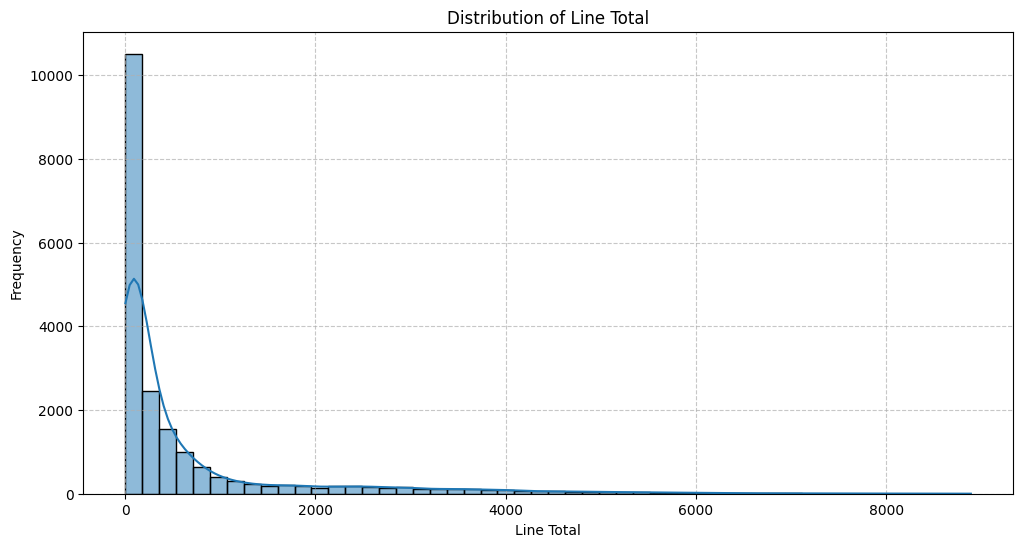

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df2['line_total'], bins=50, kde=True)
plt.title('Distribution of Line Total')
plt.xlabel('Line Total')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [16]:
display(df.head())

,order_id,customer_id,sku,quantity,unit_price,discount,order_status,order_timestamp
0,100000,1446,PHONE-009,5,424.57,0.171,RETURNED,2025-10-01 09:26:00
1,100001,4869,JACKET-180,4,157.88,0.203,COMPLETED,2025-12-02 19:17:00
2,100002,4272,LAPTOP-054,2,794.38,0.102,COMPLETED,2025-09-08 05:49:00
3,100003,3194,LAPTOP-178,5,889.75,0.258,CANCELLED,2025-11-06 21:34:00
4,100004,3165,TSHIRT-141,5,14.57,0.163,COMPLETED,2025-11-29 13:14:00


## Solution: OOP classes + revenue reports

In [19]:

import pandas as pd
import numpy as np
from dataclasses import dataclass
from typing import List, Dict, Tuple

CSV_PATH = "orders_oop_large.csv"

REQUIRED_COLS = [
    "order_id","customer_id","sku","quantity","unit_price","discount","order_status","order_timestamp"
]

STATUS_NORMALIZATION = {
    "COMPLETE": "COMPLETED",
    "DONE": "COMPLETED",
    "CANCELED": "CANCELLED",
}
VALID_STATUSES = {"COMPLETED","CANCELLED","RETURNED","PENDING","FAILED"}

@dataclass(frozen=True)
class Order:
    order_id: int
    customer_id: int
    sku: str
    quantity: int
    unit_price: float
    discount: float
    order_status: str
    order_timestamp: str

    def _normalized_discount(self) -> float:
        d = self.discount
        if d is None or (isinstance(d, float) and np.isnan(d)):
            d = 0.0
        d = float(d)
        if d < 0:
            d = 0.0
        if d > 0.60:
            d = 0.60
        return d

    def total_price(self) -> float:
        if self.quantity <= 0:
            raise ValueError(f"Invalid quantity: {self.quantity}")
        if self.unit_price < 0:
            raise ValueError(f"Invalid unit_price: {self.unit_price}")
        d = self._normalized_discount()
        return float(self.quantity * self.unit_price * (1 - d))

    def is_completed(self) -> bool:
        return self.order_status == "COMPLETED"


class OrderRepository:
    def __init__(self, csv_path: str):
        self.csv_path = csv_path
        self._orders: List[Order] = []
        self.stats: Dict[str, int] = {}

    def load(self) -> None:
        df = pd.read_csv(self.csv_path)

        missing = [c for c in REQUIRED_COLS if c not in df.columns]
        if missing:
            raise ValueError(f"Missing required columns: {missing}")

        self.stats = {"raw_rows": len(df)}

        # Clean/validate
        df["sku"] = df["sku"].astype("string")
        df = df[df["sku"].notna() & (df["sku"].str.strip() != "")]
        self.stats["dropped_missing_sku"] = self.stats["raw_rows"] - len(df)

        df["quantity"] = pd.to_numeric(df["quantity"], errors="coerce")
        before = len(df)
        df = df[df["quantity"].notna() & (df["quantity"] > 0)]
        self.stats["dropped_bad_quantity"] = before - len(df)

        df["unit_price"] = pd.to_numeric(df["unit_price"], errors="coerce")
        before = len(df)
        df = df[df["unit_price"].notna() & (df["unit_price"] >= 0)]
        self.stats["dropped_bad_unit_price"] = before - len(df)

        # Discounts: coerce numeric, fill missing later in Order logic
        df["discount"] = pd.to_numeric(df["discount"], errors="coerce")

        # Status normalization
        df["order_status"] = df["order_status"].astype("string").str.strip().str.upper()
        df["order_status"] = df["order_status"].replace(STATUS_NORMALIZATION)
        before = len(df)
        df = df[df["order_status"].isin(VALID_STATUSES)]
        self.stats["dropped_invalid_status"] = before - len(df)

        # Build Orders
        orders: List[Order] = []
        for r in df.itertuples(index=False):
            orders.append(Order(
                order_id=int(r.order_id),
                customer_id=int(r.customer_id),
                sku=str(r.sku),
                quantity=int(r.quantity),
                unit_price=float(r.unit_price),
                discount=float(r.discount) if not (isinstance(r.discount, float) and np.isnan(r.discount)) else float("nan"),
                order_status=str(r.order_status),
                order_timestamp=str(r.order_timestamp),
            ))
        self._orders = orders
        self.stats["loaded_orders"] = len(self._orders)

    @property
    def orders(self) -> List[Order]:
        return self._orders


class RevenueReport:
    def __init__(self, orders: List[Order]):
        self.orders = orders

    def revenue_by_status(self) -> Dict[str, float]:
        totals: Dict[str, float] = {}
        for o in self.orders:
            totals[o.order_status] = totals.get(o.order_status, 0.0) + o.total_price()
        # round for readability
        return {k: round(v, 2) for k, v in sorted(totals.items())}

    def total_completed_revenue(self) -> float:
        return round(sum(o.total_price() for o in self.orders if o.is_completed()), 2)

    def revenue_by_sku(self, top_n: int = 10) -> Dict[str, float]:
        totals: Dict[str, float] = {}
        for o in self.orders:
            totals[o.sku] = totals.get(o.sku, 0.0) + o.total_price()
        top = sorted(totals.items(), key=lambda x: x[1], reverse=True)[:top_n]
        return {k: round(v, 2) for k, v in top}


In [10]:
repo = OrderRepository(CSV_PATH)
repo.load()
repo.stats

{'raw_rows': 20000,
 'dropped_missing_sku': 70,
 'dropped_bad_quantity': 70,
 'dropped_bad_unit_price': 0,
 'dropped_invalid_status': 14,
 'loaded_orders': 19846}

In [11]:
report = RevenueReport(repo.orders)
rev_by_status = report.revenue_by_status()
rev_by_status

{'CANCELLED': 1276533.53,
 'COMPLETED': 8863150.55,
 'FAILED': 550885.92,
 'PENDING': 1223777.0,
 'RETURNED': 934707.86}

In [12]:
report.total_completed_revenue()

8863150.55

In [13]:
report.revenue_by_sku(top_n=10)

{'LAPTOP-107': 48597.84,
 'LAPTOP-103': 47390.5,
 'LAPTOP-018': 47202.14,
 'LAPTOP-056': 47104.27,
 'LAPTOP-094': 46648.93,
 'LAPTOP-211': 45781.87,
 'LAPTOP-008': 44537.82,
 'LAPTOP-249': 44285.85,
 'LAPTOP-235': 44223.19,
 'LAPTOP-118': 44144.43}

## Procedural comparison (pandas-only)

In [14]:
df2 = pd.read_csv(CSV_PATH)
df2['sku'] = df2['sku'].astype('string')
df2 = df2[df2['sku'].notna() & (df2['sku'].str.strip()!='')]
df2['quantity'] = pd.to_numeric(df2['quantity'], errors='coerce')
df2 = df2[df2['quantity'].notna() & (df2['quantity']>0)]
df2['unit_price'] = pd.to_numeric(df2['unit_price'], errors='coerce')
df2 = df2[df2['unit_price'].notna() & (df2['unit_price']>=0)]
df2['discount'] = pd.to_numeric(df2['discount'], errors='coerce').fillna(0.0)
df2.loc[df2['discount'] < 0, 'discount'] = 0.0
df2.loc[df2['discount'] > 0.60, 'discount'] = 0.60
df2['order_status'] = df2['order_status'].astype('string').str.strip().str.upper()
df2['order_status'] = df2['order_status'].replace(STATUS_NORMALIZATION)
df2 = df2[df2['order_status'].isin(VALID_STATUSES)]
df2['line_total'] = df2['quantity'] * df2['unit_price'] * (1 - df2['discount'])
pandas_rev = df2.groupby('order_status')['line_total'].sum().round(2).to_dict()
pandas_rev

{'CANCELLED': 1276533.53,
 'COMPLETED': 8863150.55,
 'FAILED': 550885.92,
 'PENDING': 1223777.0,
 'RETURNED': 934707.86}

In [20]:
def compare(d1, d2, tol=1e-6):
    keys = set(d1) | set(d2)
    diffs = []
    for k in sorted(keys):
        a = float(d1.get(k, 0.0))
        b = float(d2.get(k, 0.0))
        if abs(a-b) > tol:
            diffs.append((k,a,b,a-b))
    return diffs

compare(rev_by_status, pandas_rev)[:10]

[]